# PESERTA OJT DATA SCIENCE JANUARI 2022
---
## NAMA : DWI AHMAD DZULHIJJAH 
## EMAIL : 1818101@scholar.itn.ac.id
## TUGAS MODUL KE 6 : Supervised Learning
---

### Persiapan Data

#### Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

### Exploratory Data Analist

#### Plot Korelasi

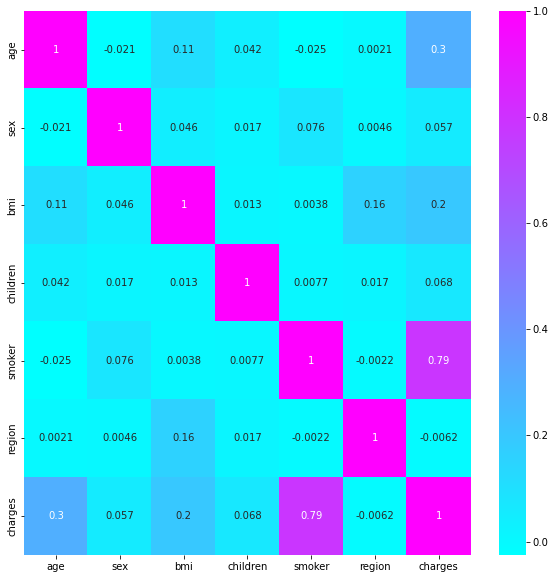

In [12]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

#### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log = LogisticRegression()

In [18]:
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
log_model = GridSearchCV(log,param_grid=params,cv=10)

In [22]:
lrc = log_model.fit(X_train,y_train)


C:\Users\dwiah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dwiah\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dwiah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\dwiah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\dwiah\anaconda3\lib\site-packages\sklearn\model_selection\_v

In [21]:
log_model.best_params_

{'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}

In [25]:
predict = log_model.predict(X_test)


In [26]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,predict))

Accuracy Score:  0.8241758241758241


In [28]:
pkl.dump(lrc, open('final_modelLRC.p','wb'))

### PREDIKSI

In [27]:
# Load model and scaler
scaler = pkl.load(open('./scaler.sav', 'rb'))
#clm = pkl.load(open('./final_modelKNN.p', 'rb'))
clm = pkl.load(open('./final_modelLRC.p', 'rb'))

# Ask user:
print("Umur: ")
age = input("")
print("Jenis Kelamin (0 Perempuan, 1 Laki-laki): ")
sex = input("")
print("Tipe Sakit Dada (0-3): ")
cp = input("")
print("Tekanan darah saat istirahat: ")
trestbps = input("")
print("Kolesterol serum dalam mg/dl: ")
chol = input("")
print("Gula darah saat berpuasa; 120 mg/dl (1 = true; 0 = false): ")
fbs = input("")
print("Resting Electrocardiographic Results (0, 1, 2): ")
restecg = input("")
print("Detak jantung maksimal: ")
thalach = input("")
print("Exercise induced angina (1 = yes; 0 = no): ")
exang = input("")
print("ST depression induced by exercise relative to rest: ")
oldpeak = input("")
print("the slope of the peak exercise ST segment: ")
slope = input("")
print("number of major vessels (0-3) colored by flourosopy: ")
ca = input("")
print("3 = normal; 6 = fixed defect; 7 = reversable defect: ")
thal = input("")

Xi = [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]
Xi = np.array(Xi)
Xi = Xi.reshape(1,-1).astype(float)
Xi = scaler.transform(Xi.astype(float))
prediction = clm.predict(Xi)

print ("\n\n Hasil Prediksi : ")
if prediction[0] == 0:
    print('\n\n Tidak ada Risiko Sakir Jantung')
else:
    print('\n\n Berisiko Sakit Jantung')

Umur: 


 22


Jenis Kelamin (0 Perempuan, 1 Laki-laki): 


 1


Tipe Sakit Dada (0-3): 


 1


Tekanan darah saat istirahat: 


 1


Kolesterol serum dalam mg/dl: 


 1


Gula darah saat berpuasa; 120 mg/dl (1 = true; 0 = false): 


 1


Resting Electrocardiographic Results (0, 1, 2): 


 1


Detak jantung maksimal: 


 1


Exercise induced angina (1 = yes; 0 = no): 


 1


ST depression induced by exercise relative to rest: 


 1


the slope of the peak exercise ST segment: 


 1


number of major vessels (0-3) colored by flourosopy: 


 1


3 = normal; 6 = fixed defect; 7 = reversable defect: 


 3




 Hasil Prediksi : 


 Tidak ada Risiko Sakir Jantung


#### MOHON KOREKSI, TERIMAKASIH :) 